# Learning outcome 4

1.       Load dataset X ... 

2.       Describe dataset (i.e. provide shape, data types and basic descriptive statistics) and scale the data (sklearn.preprocessing.scale). Describe why you scaled your data. 

3.       Perform Principal Component Analysis on the dataset. How many principal components do you need so that the explained variance score in total would be greater than 80%? 

# Learning outcome 5 

4.       From https://finance.yahoo.com download historical data for quote ? from Jan 01, 2013 – May 9, 2018. Load dataset and using column ‘Date’ set index to Pandas DataFrame that contains your data. (Remember first to convert ‘Date’ to DatetimeIndex. Is there an easier way to set time index?) 

5. Take column Adj Close and resample it with weekly frequency from Monday using the mean value of the stock price. 

# Learning outcome 6 

6.      Using the same data from LO5 calculate the simple daily percentage change in adjusted closing price (Adj Close), add another column to your data frame that will contain the descriptive variable “UP” or “DOWN” that will reflect positive and negative returns respectfully.  

7.     Using only Adj Close column resample all values to the end of the month and forward fill any missing values. Calculate the simple monthly percentage changes and compare that number to the proportion of “UP” movements you found in the previous question.  

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# LO 4

In [2]:
data=pd.read_csv('turnover.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [6]:
data.shape

(14999, 10)

# Visualisation

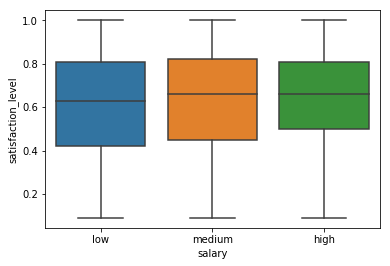

In [7]:
sns.boxplot(x=data.salary, y=data.satisfaction_level)

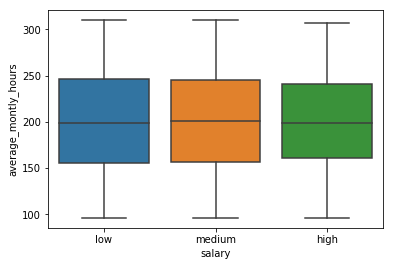

In [8]:
sns.boxplot(x=data.salary, y=data.average_montly_hours)

In [9]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [10]:
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

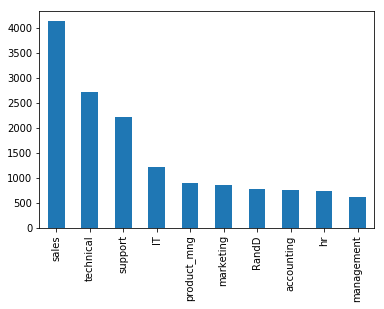

In [11]:
data.sales.value_counts().plot.bar()

We can use label encoder to transform categorical data to numerical.

In [12]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
data['sales']=le.fit_transform(data.sales)

In [16]:
data['salary']=le.fit_transform(data.salary)

In [17]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [18]:
X=data.drop(columns='left')

In [19]:
y=data.left

In [20]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [21]:
from sklearn.preprocessing import StandardScaler

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

In [22]:
X_std=StandardScaler().fit_transform(X)

C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'Cumulative explained variance')

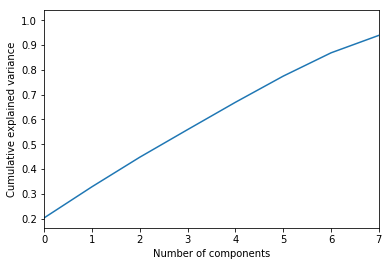

In [24]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

* How many principal components do you need so that the explained variance score in total would be greater than 80%? 

I need 6 prinicipal components to have variance score bigger than 80%

In [25]:
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [26]:
print(Y_sklearn)

[[-1.90777796  1.13322758 -0.26374884  0.54247115 -0.06635866  0.21736911]
 [ 2.15626395 -0.3728567  -0.07887945 -0.76402916 -0.66319843  0.51031189]
 [ 3.0787432   1.51894178 -0.65526221 -0.63615004 -1.01624242 -0.350085  ]
 ...
 [-2.05594997  1.16926353 -0.36790471  0.71136681 -0.33612103  0.33689152]
 [ 2.90818093  1.40961468 -0.68427067  0.81319827 -0.29404787  0.00941035]
 [-1.92069675  1.15713307 -0.3887475   0.71433737 -0.32517033  0.32587012]]


# LO 5
4. From https://finance.yahoo.com download historical data for quote ? from Jan 01, 2013 – May 9, 2018. Load dataset and using column ‘Date’ set index to Pandas DataFrame that contains your data. (Remember first to convert ‘Date’ to DatetimeIndex. Is there an easier way to set time index?) [5 points]

5. Take column Adj Close and resample it with weekly frequency from Monday using the mean value of the stock price. [5 points]

In [27]:
import pandas_datareader as pdr
from datetime import datetime, date

In [28]:
def get_stock_data (ticker, start, end):
    return pdr.get_data_yahoo(ticker,start,end)

In [29]:
start_date=datetime(year=2013, month=1, day=1)
end_date=datetime(year=2018, month=5, day=9)

In [30]:
apple=get_stock_data('AAPL', start_date, end_date)

In [31]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,79.285713,77.375717,79.117142,78.432854,140129500.0,69.319641
2013-01-03,78.524284,77.285713,78.268570,77.442856,88241300.0,68.444672
2013-01-04,76.947144,75.118568,76.709999,75.285713,148583400.0,66.538162
2013-01-07,75.614288,73.599998,74.571426,74.842857,121039100.0,66.146751
2013-01-08,75.984283,74.464287,75.601425,75.044289,114676800.0,66.324783


In [32]:
apple.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [33]:
apple_adjClose=apple['Adj Close']

In [34]:
apple_adjClose=pd.DataFrame(apple['Adj Close'])

In [35]:
apple_adjClose.head(2)

,Adj Close
Date,
2013-01-02,69.319641
2013-01-03,68.444672


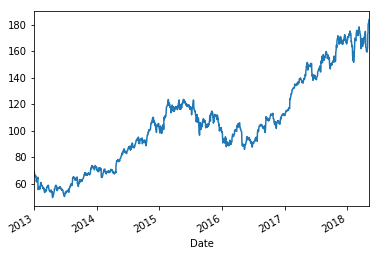

In [36]:
# first plot it
apple_adjClose['Adj Close'].plot()

In [37]:
# pretp da je cijena stocka close.

In [38]:
data_weekly=apple['Adj Close'].resample('W-MON').mean()

In [39]:
data_weekly=pd.DataFrame(data_weekly)

In [40]:
data_weekly

,Adj Close
Date,
2013-01-07,67.612307
2013-01-14,65.350574
2013-01-21,62.961578
2013-01-28,59.568443
2013-02-04,57.233677
2013-02-11,59.255927
2013-02-18,59.105002
2013-02-25,57.109549
2013-03-04,55.508152


Text(0.5, 1.0, 'Apple price weekly on Monday')

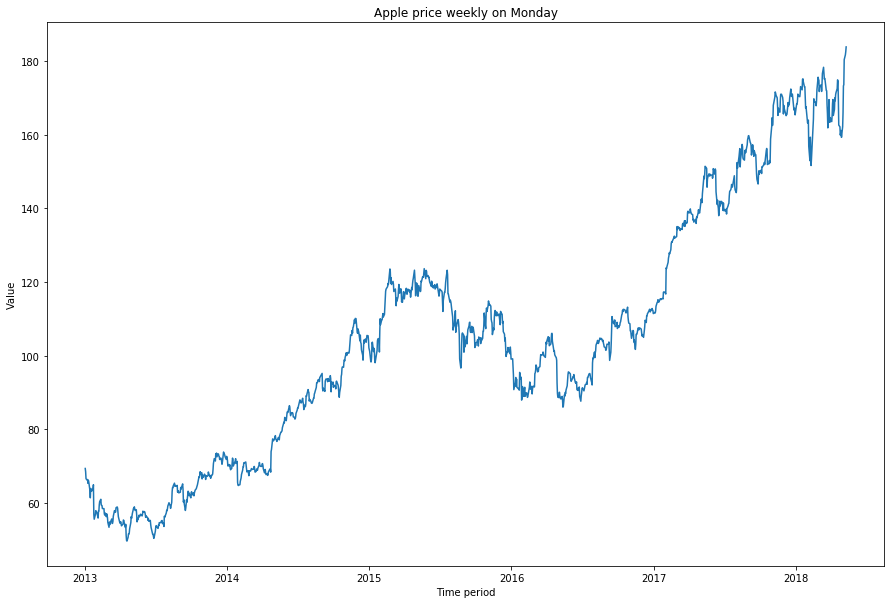

In [41]:
plt.figure(figsize=(15,10))
plt.plot(apple_adjClose['Adj Close'])
plt.xlabel('Time period')
plt.ylabel('Value')
plt.title('Apple price weekly on Monday')

# Learning outcome 6 – 10 points
6. Using the same data from LO5 calculate the simple daily percentage change in adjusted closing price (Adj Close), add another column to your data frame that will contain the descriptive variable “UP” or “DOWN” that will reflect positive and negative returns respectfully. [5 points]

7. Using only Adj Close column resample all values to the end of the month and forward fill any missing values. Calculate the simple monthly percentage changes and compare that number to the proportion of “UP” movements you found in the previous question. [5 points]

In [42]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,79.285713,77.375717,79.117142,78.432854,140129500.0,69.319641
2013-01-03,78.524284,77.285713,78.268570,77.442856,88241300.0,68.444672
2013-01-04,76.947144,75.118568,76.709999,75.285713,148583400.0,66.538162
2013-01-07,75.614288,73.599998,74.571426,74.842857,121039100.0,66.146751
2013-01-08,75.984283,74.464287,75.601425,75.044289,114676800.0,66.324783


In [43]:
apple['Daily changes']=apple['Adj Close']/apple['Adj Close'].shift(1)-1

In [44]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Daily changes
Date,,,,,,,
2013-01-02,79.285713,77.375717,79.117142,78.432854,140129500.0,69.319641,NaN
2013-01-03,78.524284,77.285713,78.268570,77.442856,88241300.0,68.444672,-0.012622
2013-01-04,76.947144,75.118568,76.709999,75.285713,148583400.0,66.538162,-0.027855
2013-01-07,75.614288,73.599998,74.571426,74.842857,121039100.0,66.146751,-0.005883
2013-01-08,75.984283,74.464287,75.601425,75.044289,114676800.0,66.324783,0.002691


In [45]:
import math

In [46]:
apple['Daily changes']=apple['Daily changes'].fillna(0)
def func(apple):
    if apple['Daily changes'] == 0:
        return 'SAME'
    elif apple['Daily changes'] > 0:
        return 'UP'
    else:
        return 'DOWN'

In [47]:
apple['Daily RETURNS']=apple.apply(func, axis=1)

In [48]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Daily changes,Daily RETURNS
Date,,,,,,,,
2013-01-02,79.285713,77.375717,79.117142,78.432854,140129500.0,69.319641,0.000000,SAME
2013-01-03,78.524284,77.285713,78.268570,77.442856,88241300.0,68.444672,-0.012622,DOWN
2013-01-04,76.947144,75.118568,76.709999,75.285713,148583400.0,66.538162,-0.027855,DOWN
2013-01-07,75.614288,73.599998,74.571426,74.842857,121039100.0,66.146751,-0.005883,DOWN
2013-01-08,75.984283,74.464287,75.601425,75.044289,114676800.0,66.324783,0.002691,UP


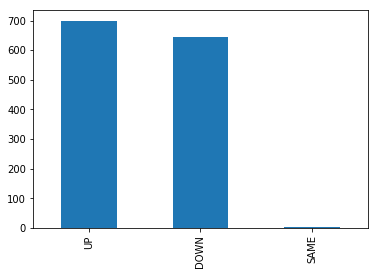

In [49]:
apple['Daily RETURNS'].value_counts().plot.bar()

In [50]:
apple_monthly=apple['Adj Close'].asfreq('M').ffill()

In [51]:
apple_monthly=pd.DataFrame(apple_monthly)

In [52]:
apple_monthly.head()

,Adj Close
Date,
2013-01-31,57.509426
2013-02-28,56.055256
2013-03-31,56.055256
2013-04-30,56.230484
2013-05-31,57.491131


Calculate the simple monthly percentage changes and compare that number to the proportion of “UP” movements you found in the previous question. 

In [53]:
apple_monthly['Monthly changes']=apple_monthly/apple_monthly.shift(1)-1

In [54]:
apple_monthly.head()

,Adj Close,Monthly changes
Date,,
2013-01-31,57.509426,NaN
2013-02-28,56.055256,-0.025286
2013-03-31,56.055256,0.000000
2013-04-30,56.230484,0.003126
2013-05-31,57.491131,0.022419


In [55]:
apple_monthly['Monthly changes']=apple_monthly['Monthly changes'].fillna(0)

In [56]:
def func(apple_monthly):
    if apple_monthly['Monthly changes'] == 0:
        return 'SAME'
    elif apple_monthly['Monthly changes'] > 0:
        return 'UP'
    else:
        return 'DOWN'

In [57]:
apple_monthly.head()

,Adj Close,Monthly changes
Date,,
2013-01-31,57.509426,0.000000
2013-02-28,56.055256,-0.025286
2013-03-31,56.055256,0.000000
2013-04-30,56.230484,0.003126
2013-05-31,57.491131,0.022419


In [58]:
apple_monthly['Monthly RETURN']=apple_monthly.apply(func, axis=1)

In [59]:
apple_monthly.head()

,Adj Close,Monthly changes,Monthly RETURN
Date,,,
2013-01-31,57.509426,0.000000,SAME
2013-02-28,56.055256,-0.025286,DOWN
2013-03-31,56.055256,0.000000,SAME
2013-04-30,56.230484,0.003126,UP
2013-05-31,57.491131,0.022419,UP


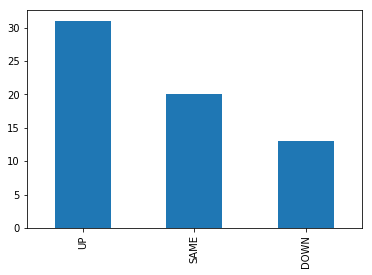

In [60]:
apple_monthly['Monthly RETURN'].value_counts().plot.bar()

In [61]:
apple['Daily RETURNS'].value_counts()

UP      699
DOWN    645
SAME      4
Name: Daily RETURNS, dtype: int64

In [62]:
apple_monthly['Monthly RETURN'].value_counts()

UP      31
SAME    20
DOWN    13
Name: Monthly RETURN, dtype: int64

In [63]:
print('Percentage UP on daily : ', 699/(699+645+4)*100,'%')
print('Percentage UP on monthly : ', 31/(31+20+13)*100,'%')

Percentage UP on daily :  51.85459940652819 %
Percentage UP on monthly :  48.4375 %
